# 平行多导线系统参数计算函数(Carson简化法计算zii 考虑集肤效应）

文件名： conductors_calc_para(r').pynb
日期： 2019.02.10
编写人： 朱明

 ## 多导线原始参数
 
 **牵引网导线架设横截面示意图**

  ![%E5%A4%8D%E7%BA%BFAT%E5%AF%BC%E7%BA%BF%E7%A9%BA%E9%97%B4%E5%88%86%E5%B8%83%E5%9B%BE.vsd.jpg](attachment:%E5%A4%8D%E7%BA%BFAT%E5%AF%BC%E7%BA%BF%E7%A9%BA%E9%97%B4%E5%88%86%E5%B8%83%E5%9B%BE.vsd.jpg)   




** 导线编号：**
 
|导线号 | 导线代码 | 导线名称 |
|:---|:---|:---|
|01|CW1|接触导线1|
|02|MW1|承力索1|
|03|PF1|正馈线1|
|04|RA1|钢轨1|
|05|RA2|钢轨2|
|06|PW1|保护线1|
|07|E1|综合地线1|
|08|CW2|接触导线2|
|09|MW2|承力索2|
|10|PF2|正馈线2|
|11|RA3|钢轨3|
|12|RA4|钢轨4|
|13|PW2|保护线2|
|14|E2|综合地线2|
  
 


** 导线架设截面坐标：**

conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

** 导线计算半径：**
conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用
** 导线等效半径：**
conductors_equivalent_radius=0.001*np.array([6.18,4.74,9.03,49.65,49.65,7.22,4.055,6.18,4.74,9.03,49.65,49.65,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用
** 导线直流电阻：**
conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
                                    
  ** 导线电阻率：**
conductors_rho=10E-10*np.array([172.41,0.185,0.29731,2.1121,2.1121,0.029667,0.19264,172.41,0.185,0.29731,2.1121,2.1121,0.029667,0.19264])
{原始参数在软件开发前期用数组形式给出，在后阶段以数据文件的形式存储，通过读取数据生成变量。}

In [35]:
import numpy as np
from scipy import linalg
from scipy import constants as C
from scipy import special

#导线定义

"""
1. 接触线（CW1）; 2.承力索（MW1）; 3.正馈线（PF1）; 4.钢轨1（RA1）;5.钢轨2（RA2）;6.保护线（PW1）;7.综合地线（E1）
8. 接触线（CW2）; 9.承力索（MW2）; 10.正馈线（PF2）; 11.钢轨3（RA3）;12.钢轨4（RA4）;13.保护线（PW2）;14.综合地线（E2）

"""
conductors_coordinater=0.001*np.array([[0,6300],[0,7500],[-4400,8500],[-755,1000],[755,1000],[-3600,8000],[-4400,500],
                                 [5000,6300],[5000,7500],[4400+5000,8500],[4245,1000],[5755,1000],[3600+5000,8000],
                                 [4400+5000,500]],np.float64)  # 多导体坐标数组 (x,y),单位 m

conductors_calc_radius=0.001*np.array([5.9,7.00,9.5,109.1,109.1,7.60,5.35,5.9,7.00,9.5,109.1,109.1,7.60,5.35])
                                    #多导体计算半径，单位 m， 计算电位系数用

conductors_equivalent_radius=0.001*np.array([6.18,4.74,9.03,49.65,49.65,7.22,4.055,6.18,4.74,9.03,49.65,49.65,7.22,4.055])
                                    #多导体等效半径,单位m, 计算自电感用


conductors_resistance=np.array([0.146,0.158,0.163,0.135,0.135,0.255,0.28,0.146,0.158,0.163,0.135,0.135,0.255,0.28])
                                    #多导体直流电阻，单位 欧/km
conductors_rho=10**-10*np.array([172.41,0.185,0.29731,2.1121,2.1121,0.029667,0.19264,172.41,0.185,0.29731,2.1121,2.1121,0.029667,0.19264])
conductors_coordinater,conductors_calc_radius,conductors_equivalent_radius,conductors_resistance,conductors_rho

(array([[ 0.   ,  6.3  ],
        [ 0.   ,  7.5  ],
        [-4.4  ,  8.5  ],
        [-0.755,  1.   ],
        [ 0.755,  1.   ],
        [-3.6  ,  8.   ],
        [-4.4  ,  0.5  ],
        [ 5.   ,  6.3  ],
        [ 5.   ,  7.5  ],
        [ 9.4  ,  8.5  ],
        [ 4.245,  1.   ],
        [ 5.755,  1.   ],
        [ 8.6  ,  8.   ],
        [ 9.4  ,  0.5  ]]),
 array([0.0059, 0.007 , 0.0095, 0.1091, 0.1091, 0.0076, 0.0053, 0.0059, 0.007 , 0.0095, 0.1091, 0.1091, 0.0076, 0.0053]),
 array([0.0062, 0.0047, 0.009 , 0.0496, 0.0496, 0.0072, 0.0041, 0.0062, 0.0047, 0.009 , 0.0496, 0.0496, 0.0072, 0.0041]),
 array([0.146, 0.158, 0.163, 0.135, 0.135, 0.255, 0.28 , 0.146, 0.158, 0.163, 0.135, 0.135, 0.255, 0.28 ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## 电位系数矩阵计算
  **函数名：  calc_potential_coefficient(c_xy,r)** 
  
 * parameters:    
       1. c_xy:  2×n维数组，多导线的坐标（x,y）,单位m;  
       2. r:     1×n维数组，导线的半径,单位 m  
 * Return:
       1. P:     n×n维数组，电位系数   
 * 功能：        计算多导体的电位系数矩阵P。 
 
  计算公式：  
  
   $$ P_{ii}=\frac{1}{2\pi\epsilon}ln\frac{2h_{i}}{r_i}=18 ×10^9ln\frac{2h_{i}}{r_i}$$
   
   $$ P_{ij}=\frac{1}{2\pi\epsilon}ln\frac{D_{ij}}{d_{ij}}=18 ×10^9ln\frac{D_{ij}}{d_{ij}}  ~~~~ (i≠j) $$
   
   
   
  ![ 导体镜像截面图](/AT_calc/images/conductors_section.png "")
  
  ![conductors_section.png](attachment:conductors_section.png)
  

In [36]:
def calc_potential_coefficient(c_xy,r):
    """ 计算电位系数矩阵P
    """
  #  epsilon0=1/(36*np.pi)*10**-9         #空气介电系数
   # c_xy=conductors_coordinater          # 多导体坐标数组 (x,y),单位 m
   # R=conductors_calc_radius             #多导体计算半径，单位 m， 计算电位系数用
    n=np.shape(c_xy)[0]
    P=np.empty((n,n),np.float64)
    for i in range(n):
        for j in range(n):
            if i==j:
                P[i,i]=18*10**+9*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                P[i,j]=18*10**+9*np.log(Dij/dij)
    return P
r=conductors_equivalent_radius
c_xy=conductors_coordinater
P=calc_potential_coefficient(c_xy,r)
print(P)

[[1.3716e+11 4.3962e+10 2.0588e+10 5.6780e+09 5.6780e+09 2.3569e+10 1.9196e+09 1.7953e+10 1.8880e+10 1.0741e+10 3.9241e+09 3.1031e+09 1.1586e+10 8.8458e+08]
 [4.3962e+10 1.4508e+11 2.3441e+10 4.7789e+09 4.7789e+09 2.6579e+10 1.7854e+09 1.8880e+10 2.0723e+10 1.2141e+10 3.6357e+09 3.0156e+09 1.2988e+10 9.3277e+08]
 [2.0588e+10 2.3441e+10 1.3573e+11 3.5827e+09 3.0956e+09 5.1530e+10 2.1201e+09 1.0741e+10 1.2141e+10 8.3095e+09 2.0769e+09 1.7404e+09 8.6241e+09 5.8208e+08]
 [5.6780e+09 4.7789e+09 3.5827e+09 6.6526e+10 9.1185e+09 4.0049e+09 1.2403e+09 3.1031e+09 3.0156e+09 1.7404e+09 1.3358e+09 8.1172e+08 1.8953e+09 1.7246e+08]
 [5.6780e+09 4.7789e+09 3.0956e+09 9.1185e+09 6.6526e+10 3.4724e+09 6.4720e+08 3.9241e+09 3.6357e+09 2.0769e+09 2.5558e+09 1.3358e+09 2.2881e+09 2.3690e+08]
 [2.3569e+10 2.6579e+10 5.1530e+10 4.0049e+09 3.4724e+09 1.3866e+11 2.2305e+09 1.1586e+10 1.2988e+10 8.6241e+09 2.2881e+09 1.8953e+09 9.0056e+09 6.1761e+08]
 [1.9196e+09 1.7854e+09 2.1201e+09 1.2403e+09 6.4720e+08 2

In [37]:
def calc_Y(f,c_xy,r):
    P = calc_potential_coefficient(c_xy,r)
    B=linalg.inv(P)#矩阵求逆
    Y= 1j*2*np.pi*f*B
    return Y
r=conductors_equivalent_radius
c_xy=conductors_coordinater
f=50
Y=calc_Y(f,c_xy,r)
print('Y矩阵(×e-12) : \n {}'.format(Y*10**12))

Y矩阵(×e-12) : 
 [[0.+2627.4068j 0. -671.1644j 0. -161.5272j 0. -119.7393j 0. -117.3136j 0. -217.2154j 0.  -24.6683j 0. -147.6189j 0. -140.9898j 0.  -50.4619j 0.  -65.2938j 0.  -40.0215j 0.  -55.0866j 0.   -5.6837j]
 [0. -671.1644j 0.+2506.0912j 0. -196.5406j 0.  -68.6925j 0.  -67.0746j 0. -252.9689j 0.  -17.2208j 0. -140.9898j 0. -160.3445j 0.  -64.5102j 0.  -44.2292j 0.  -30.4852j 0.  -67.1388j 0.   -5.3948j]
 [0. -161.5272j 0. -196.5406j 0.+2746.6057j 0.  -50.466j  0.  -33.7568j 0. -936.926j  0.  -28.5263j 0.  -50.4619j 0.  -64.5102j 0.  -42.6014j 0.  -16.2777j 0.  -11.4769j 0.  -39.1386j 0.   -2.6369j]
 [0. -119.7393j 0.  -68.6925j 0.  -50.466j  0.+4836.9928j 0. -634.6592j 0.  -61.8904j 0.  -49.396j  0.  -40.0215j 0.  -30.4852j 0.  -11.4769j 0.  -48.3652j 0.  -20.6871j 0.  -13.0706j 0.   -2.0398j]
 [0. -117.3136j 0.  -67.0746j 0.  -33.7568j 0. -634.6592j 0.+4842.0276j 0.  -42.3924j 0.  -16.8711j 0.  -65.2938j 0.  -44.2292j 0.  -16.2777j 0. -142.9252j 0.  -48.3652j 0.  -19.5476j 0.   

 
  ** 函数名: merge_potential_coefficient(P,m,k)**
 * parameters:    
       1. P:      n×n 维数组，电位系数 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. P:      n-1×n-1 维数组，归并后的电位系数   
   
 * 功能：         导线k并入导线m,计算修正后的电位系数P
 
  导线k并入m公式推导：
 
 \begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}&\dots& P_{km}&\dots&P_{kk}&\dots&P_{kn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
 \end{equation}

令 $q_{m}=q_{m}+q_{k}$ 有： 

\begin{equation} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  u_k\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&(P_{1k}-P_{1m})&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&(P_{mk}-P_{mm})&\dots&P_{mn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
   P_{k1}&\dots& P_{km}&\dots&(P_{kk}-P_{km})&\dots&P_{kn}\\
  \vdots& &\vdots& &\vdots& &\vdots\\ 
   P_{n1}&\dots& P_{nm}&\dots&(P_{nk}-P_{nm})&\dots&P_{nn}\\
  \end{bmatrix}
  \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m+q_k\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation}   

P矩阵第k列参数发生变化，修正公式为：$$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n), q_m=q_m+q_k$$.

方程中，$u_{k}-u_{m}=0$,得方程

 \begin{equation*} 
 \begin{bmatrix}
  u_1\\
  \vdots\\
  u_m\\
  \vdots\\
  0\\
  \vdots\\
  u_n
  \end{bmatrix} =
  \begin{bmatrix}
  P_{11}&\dots& P_{1m}&\dots&P_{1k}&\dots&P_{1n}\\
  \vdots& &\vdots& &\vdots& &\vdots\\
  P_{m1}&\dots& P_{mm}&\dots&P_{mk}&\dots&P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\
    P_{k1}- P_{m1}&\dots& P_{km}-P_{mm}&\dots&P_{kk}-P_{mk}&\dots&P_{kn}-P_{mn}\\
   \vdots& &\vdots& &\vdots& &\vdots\\ 
    P_{n1}&\dots& P_{nm}&\dots&P_{nk}&\dots&P_{nn}\\
   \end{bmatrix}
   \begin{bmatrix}
   q_1\\
   \vdots\\
  q_m\\
  \vdots\\
  q_k\\
  \vdots\\
  q_n
 \end{bmatrix}
\end{equation*}

第k行等式有:
$$ 0= (P_{k1}- P_{m1})q_1+\dots+（P_{km}-P_{mm})q_m+\dots+(P_{kk}-P_{mk})q_k+\dots+(P_{kn}-P_{mn})q_n$$

可以求得：
$$q_k=-\frac{(P_{k1}- P_{m1})}{(P_{kk}-P_{mk})}q_1-\dots-\frac{(P_{km}- P_{mm})}{(P_{kk}-P_{mk})}q_m\dots-\frac{(P_{kn}- P_{mn})}{(P_{kk}-P_{mk})}q_n$$

令$K_j=\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ (j≠k)，有
$$q_k=-K_1q_1-\dots-K_m q_m-\dots-K_n q_n$$

导线电压$u_i$写成方程有：
$$u_i=P_{i1}q_1+\dots+P_{im}q_m+\dots+P_{ik}q_k+\dots+P_{in}q_n$$

把$q_k$代入方程中，得到
$$u_i=（P_{i1}-P_{ik}K_1)q_1+\dots+(P_{im}-P_{ik}K_m)q_m+\dots+(P_{in}-P_{ik}K_n)q_n$$

取(i,j=0,1,...,n; i≠k;j≠k),可以得到合并矩阵元素$P_{ij}$.
 $$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$$

总之，导线k合并到导线m，P参数的修正步骤归纳如下：

（1）$P_{ik}=P_{ik}-P_{im}$ ( i=0,1,...,n)

（2）$P_{ij}=P_{ij}-P_{ik}K_j=P_{ij}-P_{ik}\frac{P_{kj}- P_{mj}}{P_{kk}-P_{mk}}$ （i,j=0,1,...,n; i≠k;j≠k）

（3）除P中的第k行第k列，P降n-1阶，为合并后n-1根导线的电位系数矩阵。

In [38]:
def merge_potential_coefficient(P,m,k):
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k or j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                        
          
    E=np.empty((n-1,n-1),np.float64)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

#测试
P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
P=merge_potential_coefficient(P,0,1) 
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,2,3)
P=merge_potential_coefficient(P,3,4)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
P=merge_potential_coefficient(P,5,6)
np.set_printoptions(precision=3,linewidth=214,suppress=True)
print('P矩阵 e+10 : \n {}'.format(P*10**-10))

P矩阵 e+10 : 
 [[ 8.807  1.426  0.715  1.729  0.802  0.402]
 [ 1.426 11.927  0.935  1.056  0.611  0.252]
 [ 0.715  0.935  2.095  0.291  0.142  0.099]
 [ 1.729  1.056  0.291  8.863  1.472  0.725]
 [ 0.802  0.611  0.142  1.472 11.97   0.947]
 [ 0.402  0.252  0.099  0.725  0.947  2.068]]


 
   
   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2）
  
   
##  电容系数矩阵计算
  函数名： calc_B(P)
  

In [39]:
def calc_B():
    """ 计算电容系数矩阵
    """
    P=calc_potential_coefficient(conductors_coordinater,conductors_calc_radius)
    P=merge_potential_coefficient(P,0,1) 
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,2,3)
    P=merge_potential_coefficient(P,3,4)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    P=merge_potential_coefficient(P,5,6)
    B=linalg.inv(P)
    return B
B=calc_B()
np.set_printoptions(precision=3,linewidth=214,suppress=True)              
          
print('B矩阵(×e-12) : \n {}'.format(B*10**12))

B矩阵(×e-12) : 
 [[12.273 -0.979 -3.388 -2.002 -0.389 -1.226]
 [-0.979  8.855 -3.489 -0.68  -0.232 -0.375]
 [-3.388 -3.489 50.569 -0.482 -0.043 -1.149]
 [-2.002 -0.68  -0.482 12.218 -1.067 -3.298]
 [-0.389 -0.232 -0.043 -1.067  8.805 -3.553]
 [-1.226 -0.375 -1.149 -3.298 -3.553 51.488]]


##  理想导体时电感L矩阵计算  

**函数名：calc_L(c_xy,r)**  
* Parameters:
    1. c_xy:      2×n维数组，多导线的坐标（x,y）,单位（m）;  
    2. r:         1×n维数组，导线的半径,单位(m)  
    
* Return:
    1. L:        n×n维数组，多导体和大地为理想导体时的自感$L_{ii}$和互感$L_{ij}$  
    
功能：    计算理想导体时的自感$L_{ii}$和互感$L_{ij}$  

**计算公式：**

导线回路电感 $$L_{ii}=\frac{\mu_0}{2\pi}ln\frac{2h_i}{r_i}=2×10^{-4}ln\frac{2h_i}{r_i}$$
导线回路互感 $$L_{ij}=\frac{\mu_0}{2\pi}ln\frac{D_{ij}}{d_{ij}}=2×10^{-4}ln\frac{D_{ij}}{d_{ij}}$$


In [40]:
def calc_L(c_xy,r):
    n=np.shape(c_xy)[0]
    L=np.empty((n,n),np.float64)
    for i in range(n):           #计算导线外自感和互电感
        for j in range(n):
            if i==j:
                L[i,i]=2*10**-4*np.log(2*c_xy[i,1]/r[i])
            else:
                Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2) 
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                L[i,j]=2*10**-4*np.log(Dij/dij) 
    return L

# 函数测试
f=50
c_xy=conductors_coordinater
r= conductors_calc_radius
L=calc_L(c_xy,r)
np.set_printoptions(precision=4,linewidth=214,suppress=True) 
print('L矩阵(×e-3) : \n {}'.format(L*10**3))


L矩阵(×e-3) : 
 [[1.5333 0.4885 0.2288 0.0631 0.0631 0.2619 0.0213 0.1995 0.2098 0.1193 0.0436 0.0345 0.1287 0.0098]
 [0.4885 1.534  0.2605 0.0531 0.0531 0.2953 0.0198 0.2098 0.2303 0.1349 0.0404 0.0335 0.1443 0.0104]
 [0.2288 0.2605 1.4979 0.0398 0.0344 0.5726 0.0236 0.1193 0.1349 0.0923 0.0231 0.0193 0.0958 0.0065]
 [0.0631 0.0531 0.0398 0.5817 0.1013 0.0445 0.0138 0.0345 0.0335 0.0193 0.0148 0.009  0.0211 0.0019]
 [0.0631 0.0531 0.0344 0.1013 0.5817 0.0386 0.0072 0.0436 0.0404 0.0231 0.0284 0.0148 0.0254 0.0026]
 [0.2619 0.2953 0.5726 0.0445 0.0386 1.5304 0.0248 0.1287 0.1443 0.0958 0.0254 0.0211 0.1001 0.0069]
 [0.0213 0.0198 0.0236 0.0138 0.0072 0.0248 1.0461 0.0098 0.0104 0.0065 0.0026 0.0019 0.0069 0.0005]
 [0.1995 0.2098 0.1193 0.0345 0.0436 0.1287 0.0098 1.5333 0.4885 0.2288 0.0631 0.0631 0.2619 0.0213]
 [0.2098 0.2303 0.1349 0.0335 0.0404 0.1443 0.0104 0.4885 1.534  0.2605 0.0531 0.0531 0.2953 0.0198]
 [0.1193 0.1349 0.0923 0.0193 0.0231 0.0958 0.0065 0.2288 0.2605 1.4979 0.034

## 计算导线内电阻和内电感
**函数名： calc_Zc(f,r,rho)**
* Parameters:
    1. f:       频率（Hz）
    2. r:      导线半径（m） 
    3. rhoi     导线电阻率（Ω/m）
* Return:
    1. Rc:      导线交流电阻（Ω/m）
    2. Xc:      导线交流内电感（H/m）  
    
 功能：计算导线的交流电阻Rc和内电感Lc
 
 实心圆柱体单位长度交流内阻抗为  
 $$ Z_c=\frac{jmρJ_0(nr)}{2\pi J_1(nr)}=\frac{jmρ}{2\pi r}\frac{ber(mr)+jbei(mr)}{ber'(mr)+jbei'(mr)}$$
 式中$n=jm\sqrt j  ,m=\sqrt\frac{ωμ}{ρ}$  
 
 导线内阻一般用上述基于贝塞尔函数的公式计算，如果导线是钢轨，由于是铁磁材质，需要通过用有限元软件计算给出。

In [41]:
def calc_Zc(f,r,mu,rho):
    #n=np.shape(rho)[0]
    #m=np.empty(n,np.float64)
    #Zc=np.empty(n,np.complex128)
    #for i in range(n):
    m=np.sqrt(2*np.pi*f*mu/rho)
    A=1j*m*rho/(2*np.pi*r)
    B=special.ber(m*r)+1j*special.bei(m*r)
    C=special.berp(m*r)+1j*special.beip(m*r)
    Zc=A*B/C
    #print(m) 
    return Zc

#测试
f=50
r=conductors_equivalent_radius          # 单位 m
mu=4*np.pi*10**-7     #
rho=conductors_rho
Zc=calc_Zc(f,r,mu,rho)
print(Zc*10**3)
print(Zc.tolist())

[0.1443+0.0157j 0.0021+0.002j  0.0014+0.0013j 0.0007+0.0007j 0.0007+0.0007j 0.0005+0.0005j 0.0025+0.0024j 0.1443+0.0157j 0.0021+0.002j  0.0014+0.0013j 0.0007+0.0007j 0.0007+0.0007j 0.0005+0.0005j 0.0025+0.0024j]
[(0.00014426356595326851+1.5676785820711064e-05j), (2.096155821906344e-06+2.0273551405362474e-06j), (1.379694276050824e-06+1.3497238471066162e-06j), (6.613914951145886e-07+6.544657058601527e-07j), (6.613914951145886e-07+6.544657058601527e-07j), (5.379965203201275e-07+5.334094911522984e-07j), (2.5162011010730395e-06+2.41737857917188e-06j), (0.00014426356595326851+1.5676785820711064e-05j), (2.096155821906344e-06+2.0273551405362474e-06j), (1.379694276050824e-06+1.3497238471066162e-06j), (6.613914951145886e-07+6.544657058601527e-07j), (6.613914951145886e-07+6.544657058601527e-07j), (5.379965203201275e-07+5.334094911522984e-07j), (2.5162011010730395e-06+2.41737857917188e-06j)]


## 计算大地与导线回路电阻和电感
**函数名：calc_Zgm(f,c_xy，rou)**  
*  Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. rou:     大地电阻率（Ω/m）
* Return:
    1. Rgm:      n×n维数组,大地与导线回路电阻（Ω/km）
    2. Xgm:      n×n维数组,大地与导线回路感抗（Ω/km）  
    
 功能：计算导线与大地的互阻抗,需要调用函数calc_Rg()，calc_Xg()



In [43]:
def calc_Zgm(f,c_xy,rou):
    n=np.shape(c_xy)[0]
    Rgm=np.empty((n,n),np.float64)
    Xgm=np.empty((n,n),np.float64)
    for i in range(n):          
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou) 
            Rgm[i,j]=calc_Rg(f,k,theta)
            Xgm[i,j]=calc_Xg(f,k,theta)
                
    return Rgm,Xgm



def calc_Rg(f,k,theta):
       
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Rg=np.pi/8
        -b1*k*np.cos(theta)
        +b1*k*np.cos(theta)
        +b2*((c2-np.log(k))*k**2*np.cos(2*theta)+theta*k**2*np.sin(2*theta))
        +b3*k**3*np.cos(3*theta)
        -d4*k**4*np.cos(4*theta)
        -b5*k**5*np.cos(5*theta)
        +b6*((c6-np.log(k))*k**2*np.cos(6*theta)+theta*k**6*np.sin(6*theta))
        +b7*np.cos(7*theta)
        -d8*k**8*np.cos(8*theta)
    else:
        Rg=np.cos(theta)/k
        -np.sqrt(2)*np.cos(2*theta)/k**2
        +np.cos(3*theta)/k**3
        +3*np.cos(5*theta)/k**5
        -45*np.cos(7*theta)
        Rg=Rg/sqrt(2)
      
    Rg=4*2*np.pi*f*10**-4*Rg
    return Rg
    
def calc_Xg(f,k,theta):
                
    b1=np.sqrt(2)/6
    b2=1/16
    b3=b1/(3*5)
    b4=b2/(4*6)
    b5=-b3/(5*7)
    b6=-b4/(6*8)
    b7=-b5/(7*9)
    b8=-b6/(8*10)
    
    c2=1.3659315
    c4=c2+1/4+1/6
    c6=c4+1/6+1/8
    c8=c4+1/8+1/10
    
    d2=np.pi/4*b2
    d4=np.pi/4*b4
    d6=np.pi/4*b6
    d8=np.pi/4*b8
    
    if k<5.1:
        Xg=0.5*(0.6159315-np.log(k))
        +b1*k*np.cos(theta)
        -d2*k*k*np.cos(2*theta)
        +b3*k**3*np.cos(3*theta)
        -b4*((c4-np.log(k))*k**4*np.cos(4*theta)+theta*k**4*np.sin(4*theta))
        +b5*k**5*np.cos(5*theta)
        -d6*k**6*np.cos(6*theta)
        +b7*k**7*np.cos(7*theta)
        -b8*((c8-np.log(k))*k**8*np.cos(8*theta)+theta*k**8*np.sin(8*theta))
    else:
        Xg=np.cos(theta)/k
        -np.cos(3*theta)/k**3
        +3*np.cos(5*theta)-45*np.cos(7*theta)
        Xg=Xg/sqrt(2)
    
    Xg=4*2*np.pi*f*10**-4*Xg
    return Xg

# 测试
f=50
rou=10**6
c_xy=conductors_coordinater
Rgm,Xgm=calc_Zgm(f,c_xy,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('Rgm 矩阵 : \n {}'.format(Rgm))
print('Xgm 矩阵 : \n {}'.format(Xgm))


Rgm 矩阵 : 
 [[0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0

In [45]:
f=2000
rou=10**6
c_xy=conductors_coordinater
n=np.shape(c_xy)[0]
for i in range(n):           #计算导线与大地回路电阻和电感
        for j in range(n):
            Dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]+c_xy[j,1])**2)
            xij=np.abs(c_xy[i,0]-c_xy[j,0])
            theta=np.arcsin(xij/Dij)
            k=4*np.pi*np.sqrt(5)*10**-4*Dij*np.sqrt(f/rou)
            print(k)
            
            
 
            
            

0.0015833626974092558
0.001734159144781566
0.0019402736669736887
0.0009222382683734463
0.0009222382683734463
0.0018530603776528735
0.0010177984466181597
0.0017034733950345947
0.001844476108675064
0.0022032399389607547
0.001061170475715786
0.001168132022016855
0.0020969277891175297
0.0014579156367288898
0.001734159144781566
0.0018849555921538759
0.0020852603742972592
0.00107234683883709
0.00107234683883709
0.001999632978483736
0.0011473309708186624
0.001844476108675064
0.0019869176531592202
0.0023319337800406367
0.0011939376439506018
0.0012899367193675174
0.002227511041091842
0.0015511198156428663
0.0019402736669736887
0.0020852603742972592
0.0021362830044410596
0.001278661555227996
0.0013582382184538755
0.0020758868350710356
0.0011309733552923257
0.0022032399389607547
0.0023319337800406367
0.0027515473854711737
0.001614111172606516
0.0017474667965698752
0.002639685721287496
0.0020703643809268733
0.0009222382683734463
0.00107234683883709
0.001278661555227996
0.0002513274122871835
0.0003

## 导线简化计算阻抗
** calc_z(f,c_xy,r,re,rou)** 
* Parameters:
    1. f:       频率（Hz）
    2. c_xy:    2×n维数组，多导线的坐标（x,y）,单位（m）; 
    3. r:       1×n维数组导线，等效半径（m）
    4. re       1×n维数组，导线电阻
    5. rou      大地电阻率（Ω/m）
* Return:
    1. R:      导线交流电阻（Ω/m）
    2. X:      导线交流内电感（亨/km） 
    

In [46]:
f=50
r=conductors_equivalent_radius
# m=np.sqrt(2*np.pi*f*mu/rho)
# print(m)
# print(r)
# #m=149.1
# A1=m*r/2
# A2=4/(m*r)
# B1=special.ber(m*r)
# B2=special.bei(m*r)
# C1=special.berp(m*r)
# C2=special.beip(m*r)
# aR=A1*(B1*C2-C1*B2)/(C1**2+C2**2)
# aL=A2*(C2*B2+C1*B1)/(C1**2+C2**2)
# print(aR)
# print(aL)
rho=conductors_rho
m=np.sqrt(2*np.pi*f*mu/rho)
print(rho)
print(r)
print(m)
#m=149.1
A1=m*r/2
A2=4/(m*r)
B1=special.ber(m*r)
B2=special.bei(m*r)
C1=special.berp(m*r)
C2=special.beip(m*r)
aR=A1*((B1*C2-C1*B2)/(C1**2+C2**2))
aL=A2*((B2*C2-C1*B1)/(C1**2+C2**2))
print(aR)
print(aL)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0062 0.0047 0.009  0.0496 0.0496 0.0072 0.0041 0.0062 0.0047 0.009  0.0496 0.0496 0.0072 0.0041]
[  151.3208  4619.4897  3643.9727  1367.1703  1367.1703 11535.6761  4526.9598   151.3208  4619.4897  3643.9727  1367.1703  1367.1703 11535.6761  4526.9598]
[ 1.004   7.9976 11.8877 24.2512 24.2512 29.6982  6.7473  1.004   7.9976 11.8877 24.2512 24.2512 29.6982  6.7473]
[ 2.965  -0.1679  0.1025  0.0107  0.0107  0.001  -0.1486  2.965  -0.1679  0.1025  0.0107  0.0107  0.001  -0.1486]


In [11]:
import math
r=conductors_equivalent_radius
rp=(math.e*r)**(-aL/4)
print(rp)

[20.6775  0.8331  1.0997  1.0053  1.0053  1.001   0.8458 20.6775  0.8331  1.0997  1.0053  1.0053  1.001   0.8458]


In [12]:
def calc_z(f,c_xy,r,Re,rou):
    n=np.shape(c_xy)[0]
    R=np.empty((n,n),np.float64)
    X=np.empty((n,n),np.float64)
    z=np.empty((n,n),np.complex128)
    Rg=np.pi**2*f*10**-4
    Dg=660*np.sqrt(rou/f)
    for i in range(n):           #
        for j in range(n):
            if i==j:
                R[i,j]=Rg+Re[i]
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/rp[i])#rp为几何半径
            else:
                dij=np.sqrt((c_xy[i,0]-c_xy[j,0])**2+(c_xy[i,1]-c_xy[j,1])**2)
                R[i,j]=Rg
                X[i,j]=2*2*np.pi*f*10**-4*np.log(Dg/dij)
    z=R+1j*X        
    return R,X,z
# 测试该函数
f=50
c_xy=conductors_coordinater
#r=conductors_equivalent_radius
rd=conductors_resistance
Re=rd*aR
rou=10**6
R,X,z=calc_z(f,c_xy,r,Re,rou)
np.set_printoptions(precision=4,linewidth=214,suppress=True)
print('R 矩阵 : \n {}'.format(R))
print('X 矩阵 : \n {}'.format(X))
print('z 矩阵 : \n {}'.format(z))

R 矩阵 : 
 [[0.1959 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 1.313  0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 1.987  0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 3.3233 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 3.3233 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 7.6224 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 1.9386 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.1959 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 1.313  0.0493 0.0493 0.0493 0.0493 0.0493]
 [0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 0.0493 1.987  0.0493 0.0

# 5 阻抗矩阵合并

** 函数名：merge_z(z,i,j)**
* parameters:    
       1. z:      n×n 维数组，阻抗矩阵 ;  
       2. m:      第 m 号导线（导线序号从0开始）；
       3. k:      第 k 号导线，m＜k≤n,
 * Return:
       1. z:      n-1×n-1 维数组，归并后的电位系数  
       
功能： 导线j并入导线i, i＜j≤n, n为z的阶，输出合并阻抗矩阵z,z降一阶




   AT牵引网络由14根导线逐步合并成6根导线：
   
  （1） 1. 接触线（CW1）+ 2.承力索（MW1）
  
  （2） 3.正馈线（PF1）
  
  （3） 4.钢轨1（RA1）+5.钢轨2（RA2）+6.保护线（PW1）+7.综合地线（E1）
  
  （4） 8. 接触线（CW2）+ 9.承力索（MW2）
  
  （5） 10.正馈线（PF2）
  
  （6） 11.钢轨3（RA3）+12.钢轨4（RA4）+13.保护线（PW2）+14.综合地线（E2） 
 

In [13]:
def merge_z(z,m,k):
    P=z
    n=np.shape(P)[0]
    for i in range(n):
        P[i,k]=P[i,k]-P[i,m]
         
    for i in range(n):
        for j in range(n):
            if i!=k or j!=k:
                P[i,j]=P[i,j]-(P[k,j]-P[m,j])/(P[k,k]-P[m,k])*P[i,k]
                               
            
    E=np.empty((n-1,n-1),np.complex128)
    for i in range(n):
        for j in range(n):
            if i<k:
                if j<k:
                    E[i,j]=P[i,j]
                if j>k:
                    E[i,j-1]=P[i,j]
            if i>k:
                if j<k:
                    E[i-1,j]=P[i,j]
                if j>k:
                    E[i-1,j-1]=P[i,j]
    
    return E

# 测试
f=50
c_xy=conductors_coordinater
r=conductors_equivalent_radius
re=conductors_resistance
rou=10**6
R,X,z=calc_z(f,c_xy,r,re,rou)

z=merge_z(z,0,1) 
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,2,3)
z=merge_z(z,3,4)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
z=merge_z(z,5,6)
Z=np.abs(z)
np.set_printoptions(precision=4,linewidth=214,suppress=True)              
print('阻抗矩阵z （Ω/km）: \n {}'.format(z))
print('阻抗矩阵Z （Ω/km）: \n {}'.format(Z))

阻抗矩阵z （Ω/km）: 
 [[0.1575+0.6773j 0.0584+0.615j  0.0503+0.6129j 0.0498+0.6166j 0.0486+0.5789j 0.0514+0.5861j]
 [0.0584+0.615j  0.256 +0.6861j 0.0369+0.6178j 0.0505+0.5771j 0.0497+0.5551j 0.0505+0.558j ]
 [0.0503+0.6129j 0.0369+0.6178j 0.1056+0.6531j 0.0472+0.5861j 0.0394+0.5686j 0.0548+0.591j ]
 [0.0498+0.6166j 0.0505+0.5771j 0.0472+0.5861j 0.1557+0.6781j 0.0571+0.6153j 0.0484+0.6145j]
 [0.0486+0.5789j 0.0497+0.5551j 0.0394+0.5686j 0.0571+0.6153j 0.2542+0.6857j 0.0364+0.6194j]
 [0.0514+0.5861j 0.0505+0.558j  0.0548+0.591j  0.0484+0.6145j 0.0364+0.6194j 0.1007+0.6491j]]
阻抗矩阵Z （Ω/km）: 
 [[0.6953 0.6178 0.615  0.6186 0.5809 0.5884]
 [0.6178 0.7323 0.6189 0.5793 0.5574 0.5603]
 [0.615  0.6189 0.6615 0.588  0.57   0.5936]
 [0.6186 0.5793 0.588  0.6957 0.618  0.6164]
 [0.5809 0.5574 0.57   0.618  0.7313 0.6205]
 [0.5884 0.5603 0.5936 0.6164 0.6205 0.6568]]


## 频率变化对aR的影响

In [25]:
x1=np.arange(500,5000,10)

In [26]:
def calc_aRaLch(fch):
    a=np.shape(fch)[0]
    b=np.shape(rho)[0]
    aRch=np.empty((a,b),np.float64)
    aLch=np.empty((a,b),np.float64)
    m=np.empty((a,b),np.float64)
    for i in range(a):
        for j in range(b):
            m[i,j]=np.sqrt(2*np.pi*fch[i]*mu/rho[j])
    A1=m*r/2
    A2=4/(m*r)
    B1=special.ber(m*r)
    B2=special.bei(m*r)
    C1=special.berp(m*r)
    C2=special.beip(m*r)
    aRch=A1*((B1*C2-C1*B2)/(C1**2+C2**2))
    aLch=A2*((B2*C2+C1*B1)/(C1**2+C2**2))
    return aRch,aLch

In [27]:
r=conductors_equivalent_radius
fch=x1
aRch,aLch=calc_aRaLch(fch)
print(aRch)
print(aLch)

[[  1.3044  24.7328  37.0403 ...  76.1428  93.3689  20.7758]
 [  1.3138  24.9764  37.4063 ...  76.8979  94.2954  20.98  ]
 [  1.3232  25.2176  37.7688 ...  77.6457  95.2129  21.1822]
 ...
 [  3.5603  77.4334 116.2379 ...      nan      nan  64.9569]
 [  3.5636  77.511  116.3545 ...      nan      nan  65.022 ]
 [  3.5669  77.5886 116.471  ...      nan      nan  65.087 ]]
[[0.8516 0.0408 0.0272 ... 0.0132 0.0107 0.0487]
 [0.8472 0.0404 0.0269 ... 0.013  0.0106 0.0482]
 [0.8428 0.0401 0.0267 ... 0.0129 0.0105 0.0478]
 ...
 [0.3018 0.013  0.0086 ...    nan    nan 0.0155]
 [0.3015 0.0129 0.0086 ...    nan    nan 0.0154]
 [0.3012 0.0129 0.0086 ...    nan    nan 0.0154]]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in multiply
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in add
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


* 绘图

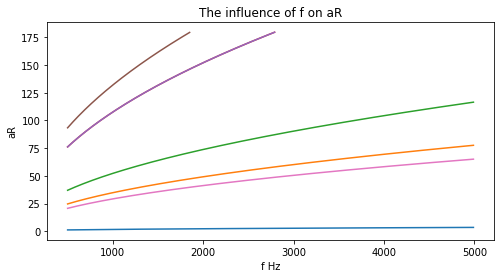

In [28]:
import matplotlib.pyplot as plt
x=x1
y1=aRch[:,0]
y2=aRch[:,1]
y3=aRch[:,2]
y4=aRch[:,3]
y5=aRch[:,4]
y6=aRch[:,5]
y7=aRch[:,6]

plt.xlabel('f Hz')
plt.ylabel('aR')
plt.title('The influence of f on aR')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.show()

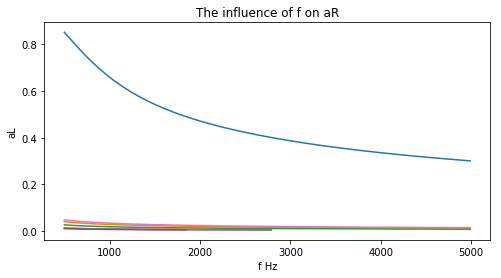

In [29]:
y1=aLch[:,0]
y2=aLch[:,1]
y3=aLch[:,2]
y4=aLch[:,3]
y5=aLch[:,4]
y6=aLch[:,5]
y7=aLch[:,6]

plt.xlabel('f Hz')
plt.ylabel('aL')
plt.title('The influence of f on aR')
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.plot(x,y7)
plt.show()

## 频率变化对阻抗的影响

In [30]:
def calc_fch(fch):
    a=np.shape(fch)[0]
    b=np.shape(Z)[0]#H矩阵的列数，6
    H=np.empty((a,b),np.complex128)
    Lch=np.empty((a,b),np.float64)

    for i in range(a):
        for j in range(b):
            R,X,z=calc_z(fch[i],c_xy,r,re,rou)
            z=merge_z(z,0,1) 
            z=merge_z(z,2,3)
            z=merge_z(z,2,3)
            z=merge_z(z,2,3)
            z=merge_z(z,3,4)
            z=merge_z(z,5,6)
            z=merge_z(z,5,6)
            z=merge_z(z,5,6)
            H[i][j]=z[j][j]
    Zch=np.abs(H)
    Rch=np.real(H)
    Xch=np.imag(H)

    for i in range(a):
        for j in range(b):
            w=2*np.pi*fch[i]
            Lch[i][j]=Xch[i][j]/w
    return H,Rch,Lch,Xch,Zch
fch=x1
H,Rch,Lch,Xch,Zch=calc_fch(fch)
print('H 矩阵 : \n {}'.format(H))
print('Lch 矩阵 : \n {}'.format(Lch))
print('Rch矩阵 : \n {}'.format(Rch))
print('Xch矩阵 : \n {}'.format(Xch))
print('Zch矩阵 : \n {}'.format(Zch))


H 矩阵 : 
 [[0.7389 +6.4665j 0.92   +5.3011j 0.588  +5.6453j 0.7156 +6.5268j 0.848  +5.4185j 0.5531 +5.6949j]
 [0.7491 +6.5899j 0.9307 +5.3981j 0.5981 +5.7514j 0.7257 +6.6518j 0.8582 +5.519j  0.563  +5.8024j]
 [0.7594 +6.7133j 0.9414 +5.4949j 0.6081 +5.8573j 0.7358 +6.7767j 0.8685 +5.6193j 0.5729 +5.9097j]
 ...
 [5.1607+57.2185j 5.3568+44.762j  5.0065+48.7901j 5.1333+57.9144j 5.2701+46.2693j 4.965 +49.4187j]
 [5.1706+57.3274j 5.3667+44.8458j 5.0164+48.8819j 5.1432+58.0247j 5.2799+46.3561j 4.9749+49.5118j]
 [5.1805+57.4362j 5.3766+44.9295j 5.0263+48.9738j 5.153 +58.1349j 5.2898+46.4428j 4.9848+49.605j ]]
Lch 矩阵 : 
 [[0.0021 0.0017 0.0018 0.0021 0.0017 0.0018]
 [0.0021 0.0017 0.0018 0.0021 0.0017 0.0018]
 [0.0021 0.0017 0.0018 0.0021 0.0017 0.0018]
 ...
 [0.0018 0.0014 0.0016 0.0019 0.0015 0.0016]
 [0.0018 0.0014 0.0016 0.0019 0.0015 0.0016]
 [0.0018 0.0014 0.0016 0.0019 0.0015 0.0016]]
Rch矩阵 : 
 [[0.7389 0.92   0.588  0.7156 0.848  0.5531]
 [0.7491 0.9307 0.5981 0.7257 0.8582 0.563 ]
 [0.

* f对R的影响

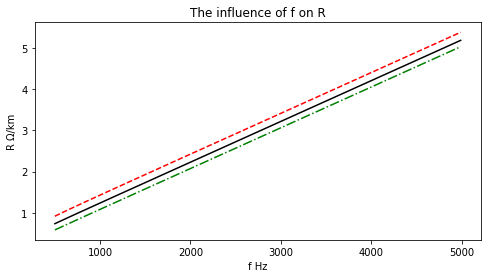

In [31]:
import matplotlib.pyplot as plt
def draw_R(fch):
    x=fch
    y1=Rch[:,0]
    y2=Rch[:,1]
    y3=Rch[:,2]
    y4=Rch[:,3]
    y5=Rch[:,4]
    y6=Rch[:,5]
    #my_x_ticks = np.arange(0, 100, 10)

    plt.xlabel('f Hz')
    plt.ylabel('R Ω/km')
    plt.title('The influence of f on R')


    #my_x_ticks=np.arange(0,100000,1000)
    #my_y_ticks=np.arange(0,1.5,0.1)
    #plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)
    plt.rcParams['figure.figsize']=(8.0,4.0)


    R1=plt.plot(x,y1,color='black')
    R2=plt.plot(x,y2,color='red',ls='--')
    R3=plt.plot(x,y3,color='green',ls='-.')
#     R4=plt.plot(x,y4,color='blue')
#     R5=plt.plot(x,y5,color='orange')
#     R6=plt.plot(x,y6,color='purple')
#    return R1,R2,R3,R4,R5,R6
    return R1,R2,R3
    #plt.figure(figsize=(1, 8)) 
x=x1
R1,R2,R3=draw_R(fch)
#R1,R2,R3,R4,R5,R6=draw_R(fch)
plt.show()

* f对L的影响

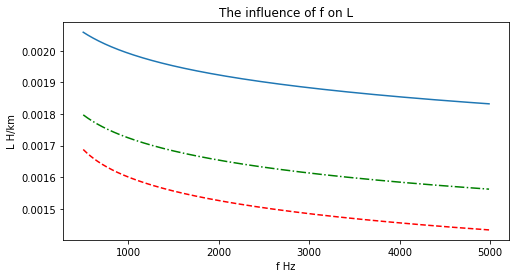

In [32]:
def draw_L(fch):
    x=fch
    y1=Lch[:,0]
    y2=Lch[:,1]
    y3=Lch[:,2]
    y4=Lch[:,3]
    y5=Lch[:,4]
    y6=Lch[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('L H/km')
    plt.title('The influence of f on L')

    L1=plt.plot(x,y1)
    L2=plt.plot(x,y2,color='red',ls='--')
    L3=plt.plot(x,y3,color='green',ls='-.')
#     L4=plt.plot(x,y4,color='blue')
#     L5=plt.plot(x,y5,color='orange',ls='--')
#     L6=plt.plot(x,y6,color='purple',ls='-.')
    #Legend=plt.legend(handles = [L1,L2,L3], labels = ['L1''L2','L3'])
#    return L1,L2,L3,L4,L5,L6
    return L1,L2,L3
x=x1
L1,L2,L3=draw_L(fch)
plt.show()


    f对X的影响



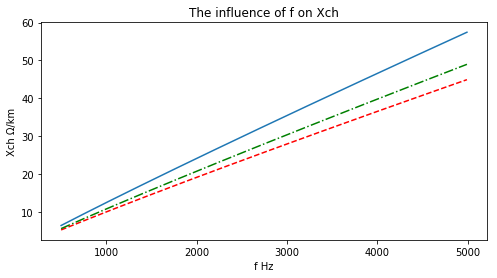

In [33]:
def draw_X(fch):
    x=fch
    y1=Xch[:,0]
    y2=Xch[:,1]
    y3=Xch[:,2]
    y4=Xch[:,3]
    y5=Xch[:,4]
    y6=Xch[:,5]

    plt.xlabel('f Hz')
    plt.ylabel('Xch Ω/km')
    plt.title('The influence of f on Xch')
    X1=plt.plot(x,y1)
    X2=plt.plot(x,y2,color='red',ls='--')
    X3=plt.plot(x,y3,color='green',ls='-.')
#     X4=plt.plot(x,y4,color='blue')
#     X5=plt.plot(x,y5,color='orange',ls='--')
#     X6=plt.plot(x,y6,color='purple',ls='-.')
#    return X1,X2,X3,X4,X5,X6
    return X1,X2,X3
x1=fch
X1,X2,X3=draw_X(fch)
plt.show()

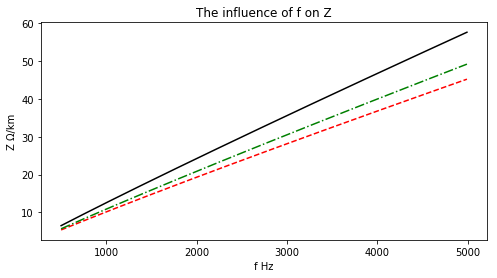

In [34]:
def draw_Z(fch):
    x=fch
    y1=Zch[:,0]
    y2=Zch[:,1]
    y3=Zch[:,2]
    y4=Zch[:,3]
    y5=Zch[:,4]
    y6=Zch[:,5]
    #my_x_ticks = np.arange(0, 100, 10)

    plt.xlabel('f Hz')
    plt.ylabel('Z Ω/km')
    plt.title('The influence of f on Z')


    #my_x_ticks=np.arange(0,100000,1000)
    #my_y_ticks=np.arange(0,1.5,0.1)
    #plt.xticks(my_x_ticks)
    #plt.yticks(my_y_ticks)
    plt.rcParams['figure.figsize']=(8.0,4.0)


    Z1=plt.plot(x,y1,color='black')
    Z2=plt.plot(x,y2,color='red',ls='--')
    Z3=plt.plot(x,y3,color='green',ls='-.')
#     R4=plt.plot(x,y4,color='blue')
#     R5=plt.plot(x,y5,color='orange')
#     R6=plt.plot(x,y6,color='purple')
#    return R1,R2,R3,R4,R5,R6
    return Z1,Z2,Z3
    #plt.figure(figsize=(1, 8)) 
x=x1
Z1,Z2,Z3=draw_Z(fch)
#R1,R2,R3,R4,R5,R6=draw_R(fch)
plt.show()